In [1]:
%matplotlib notebook
import numpy as np # linear algebra
import pandas as pnd # data processing
import seaborn as sns  # data visualization library  
import matplotlib.pyplot as plt

In [3]:
df_train_transaction = pnd.read_csv('train_transaction.csv')
df_train_identity = pnd.read_csv('train_identity.csv')
#Fusion des deux fichiers sur la base de la colonne TransactionID
full_train = pnd.merge(df_train_transaction,df_train_identity, on='TransactionID', how='left')
full_train.to_csv('train_combined.csv',index=False)

In [4]:
def top_missing_cols(df,n=10,thresh=80):
    """
    returns missing columns in dataframe with missing values percent > thresh
    if n=None. It will gave whole dataframe with missing values percent > thresh
    """
    
    dff = (df.isnull().sum()/df.shape[0])*100
    dff = dff.reset_index()
    dff.columns = ['col','missing_percent']
    dff = dff.sort_values(by=['missing_percent'],ascending=False).reset_index(drop=True)
    print(f'There are {df.isnull().any().sum()} columns in this dataset with missing values.')
    print(f'There are {dff[dff["missing_percent"] > thresh].shape[0]} columns with missing percent values than {thresh}%')
    if n:
        return dff.head(n)
    else:
        return dff

# Coorelation Analysis
Nous avons beaucoup de valeurs NAN présentes dans nos données. Prendre toutes les colonnes est inutile. La suppression des colonnes avec une corrélation élevée rend notre modèle plus rapide et plus précis

In [5]:
df_missing = top_missing_cols(full_train,n=None,thresh=50)
# Taking all column with missing percen > 50
missing_cols = df_missing['col']

There are 414 columns in this dataset with missing values.
There are 214 columns with missing percent values than 50%


In [7]:
# we will take all columns and group them based on missing percentage
nan_dict = {}
for col in missing_cols:
    count = full_train[col].isnull().sum()
    try:
        nan_dict[count].append(col)
    except:
        nan_dict[count] = [col]
        
for k,v in nan_dict.items():
    print(f'#####' * 4)
    print(f'NAN count = {k} percent: {(int(k)/full_train.shape[0])*100} %')
    print(v)

####################
NAN count = 585793 percent: 99.19615944728554 %
['id_24']
####################
NAN count = 585408 percent: 99.13096487960172 %
['id_25']
####################
NAN count = 585385 percent: 99.12707013919464 %
['id_07', 'id_08']
####################
NAN count = 585381 percent: 99.12639279303687 %
['id_21']
####################
NAN count = 585377 percent: 99.12571544687913 %
['id_26']
####################
NAN count = 585371 percent: 99.1246994276425 %
['id_27', 'id_23', 'id_22']
####################
NAN count = 552913 percent: 93.62837403054831 %
['dist2']
####################
NAN count = 551623 percent: 93.40992989467267 %
['D7']
####################
NAN count = 545427 percent: 92.36072069631184 %
['id_18']
####################
NAN count = 528588 percent: 89.50926270870728 %
['D13']
####################
NAN count = 528353 percent: 89.46946862193924 %
['D14']
####################
NAN count = 525823 percent: 89.04104717715988 %
['D12']
####################
NAN count = 52

On peut constater que ces features n'ont pas de valeur NAN

'C9', 'C14', 'C13', 'C12', 'C11', 'C10', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'C6', 'card1', 
'C8', 'C7', 'C5', 'C4', 'C3', 'C2', 'C1', 'isFraud', 'TransactionID

# Coorelation analysis on id columns


In [8]:
id_cols = [col for col in full_train.columns if col[0]+col[1] == 'id']
full_train[id_cols].head()

id_01    id_02  id_03  id_04  id_05  id_06  id_07  id_08  id_09  id_10  \
0    NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1    NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2    NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3    NaN      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4    0.0  70787.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

   ...     id_29        id_30                id_31  id_32      id_33  \
0  ...       NaN          NaN                  NaN    NaN        NaN   
1  ...       NaN          NaN                  NaN    NaN        NaN   
2  ...       NaN          NaN                  NaN    NaN        NaN   
3  ...       NaN          NaN                  NaN    NaN        NaN   
4  ...  NotFound  Android 7.0  samsung browser 6.2   32.0  2220x1080   

            id_34  id_35  id_36  id_37  id_38  
0             NaN    NaN    NaN    NaN    NaN  
1             NaN    NaN    NaN    NaN    NaN  
2             NaN    NaN    NaN    NaN    NaN  
3             NaN    NaN    NaN    NaN    NaN  
4  match_status:2      T      F      T      T  

[5 rows x 38 columns]

<IPython.core.display.Javascript object>


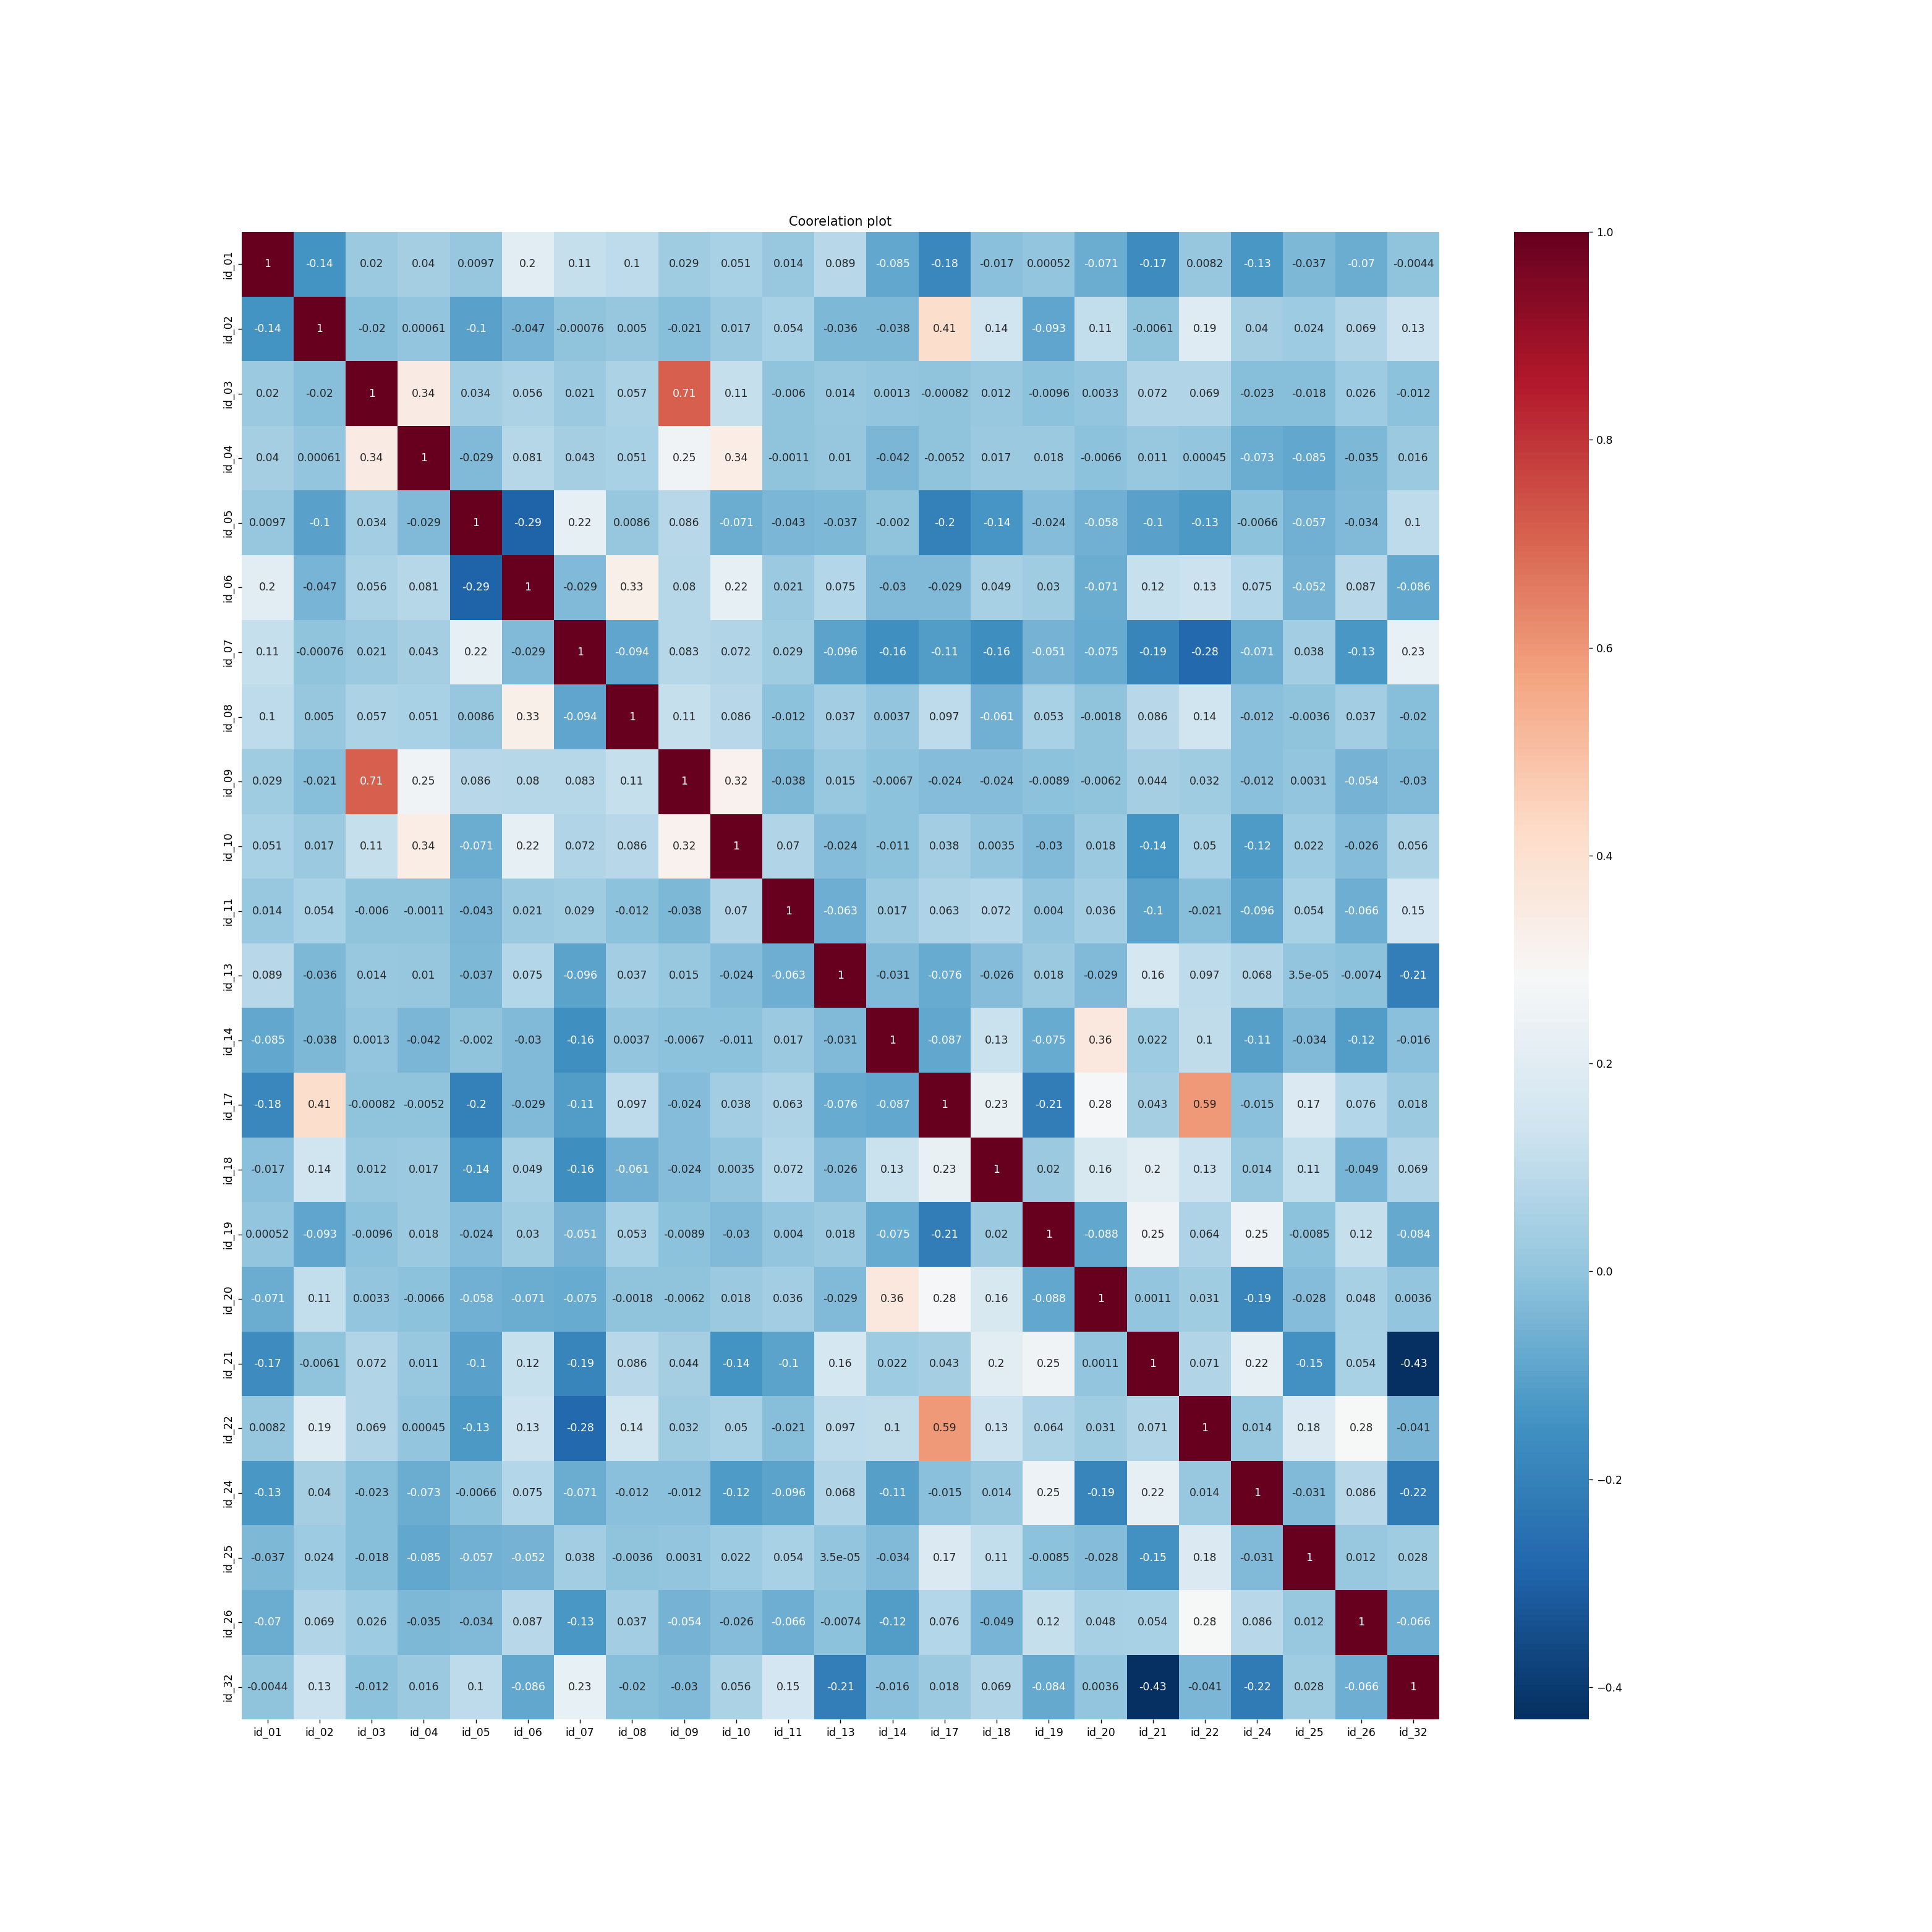

In [9]:
fig,axes = plt.subplots(1,1,figsize=(25,25))
df_corr = full_train[id_cols].corr()
sns.heatmap(df_corr,annot=True,cmap='RdBu_r')
axes.title.set_text('Coorelation plot')
plt.show()

Nous pouvons voir qu'il n'y a pas beaucoup de forte corrélation entre les colonnes id

# Coorelation analysis on M columns

In [12]:
mFeature = full_train[['M3','M4','M5','M6','M7','M8','M9','isFraud']]

In [13]:
mFeature.head()

M3   M4   M5   M6   M7   M8   M9  isFraud
0    T   M2    F    T  NaN  NaN  NaN        0
1  NaN   M0    T    T  NaN  NaN  NaN        0
2    T   M0    F    F    F    F    F        0
3  NaN   M0    T    F  NaN  NaN  NaN        0
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN        0

# Coorelation analysis on C columns

In [14]:
c_features = [features for features in full_train.columns if 'C' in features] 

In [15]:
c_features.remove('ProductCD')

In [16]:
c_features

['C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14']

In [17]:
for features in  c_features:

    print("total number of categories in  {} {} ".format(features,len(full_train[features].value_counts())))

total number of categories in  C1 1657 
total number of categories in  C2 1216 
total number of categories in  C3 27 
total number of categories in  C4 1260 
total number of categories in  C5 319 
total number of categories in  C6 1328 
total number of categories in  C7 1103 
total number of categories in  C8 1253 
total number of categories in  C9 205 
total number of categories in  C10 1231 
total number of categories in  C11 1476 
total number of categories in  C12 1199 
total number of categories in  C13 1597 
total number of categories in  C14 1108 


C3 est corrélé négativement avec toutes les autres features, 
y compris la cible, nous ne prenons donc pas cette features

<IPython.core.display.Javascript object>


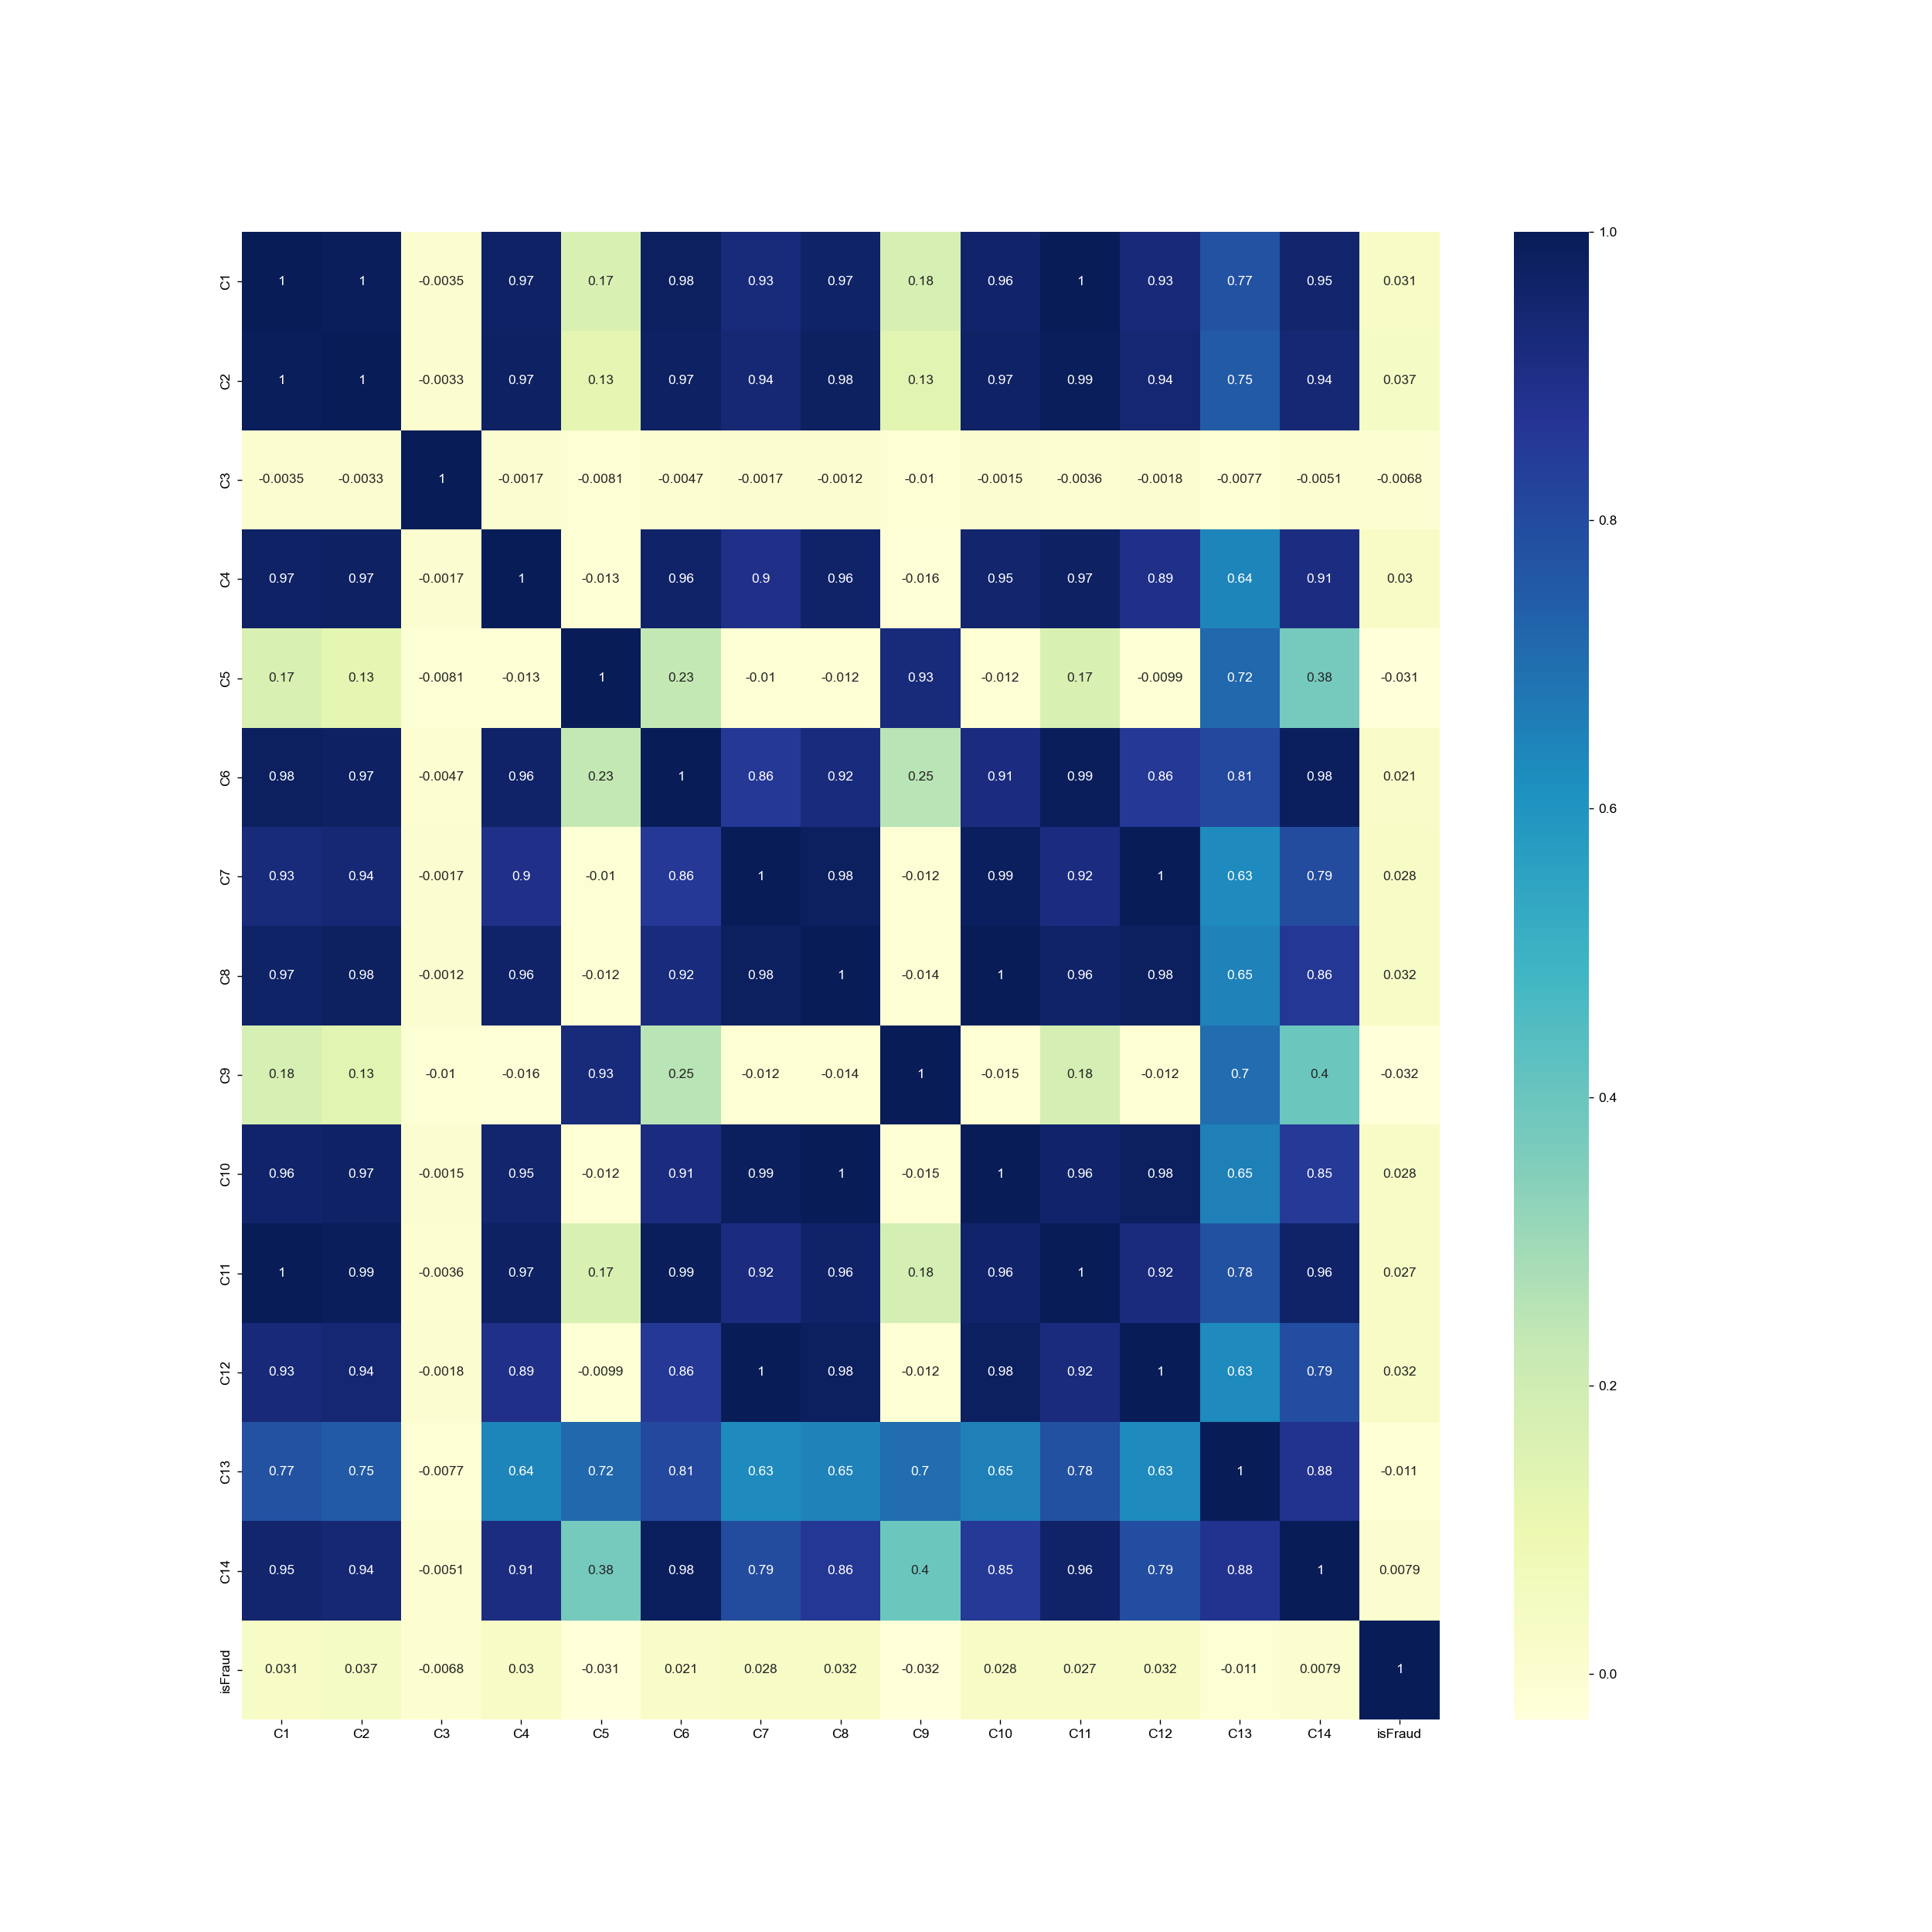

In [18]:
c_features += ['isFraud']
correlation_c = full_train[c_features].corr()
plt.subplots(figsize = (20, 20))
sns.heatmap(correlation_c,annot=True, cmap = 'YlGnBu') 
sns.set(font_scale=1)

In [19]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [20]:
new_c = correlation(correlation_c, 0.9)

In [22]:
print( "Ces caractéristiques sont fortement corrélées" + str(new_c))

Ces caractéristiques sont fortement corrélées{'C6', 'C10', 'C9', 'C7', 'C14', 'C12', 'C11', 'C8', 'C4', 'C2'}


# Coorelation analysis on D columns

In [23]:
D_features = [ 'D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15'] 

In [24]:
D_features += ['isFraud']

<IPython.core.display.Javascript object>


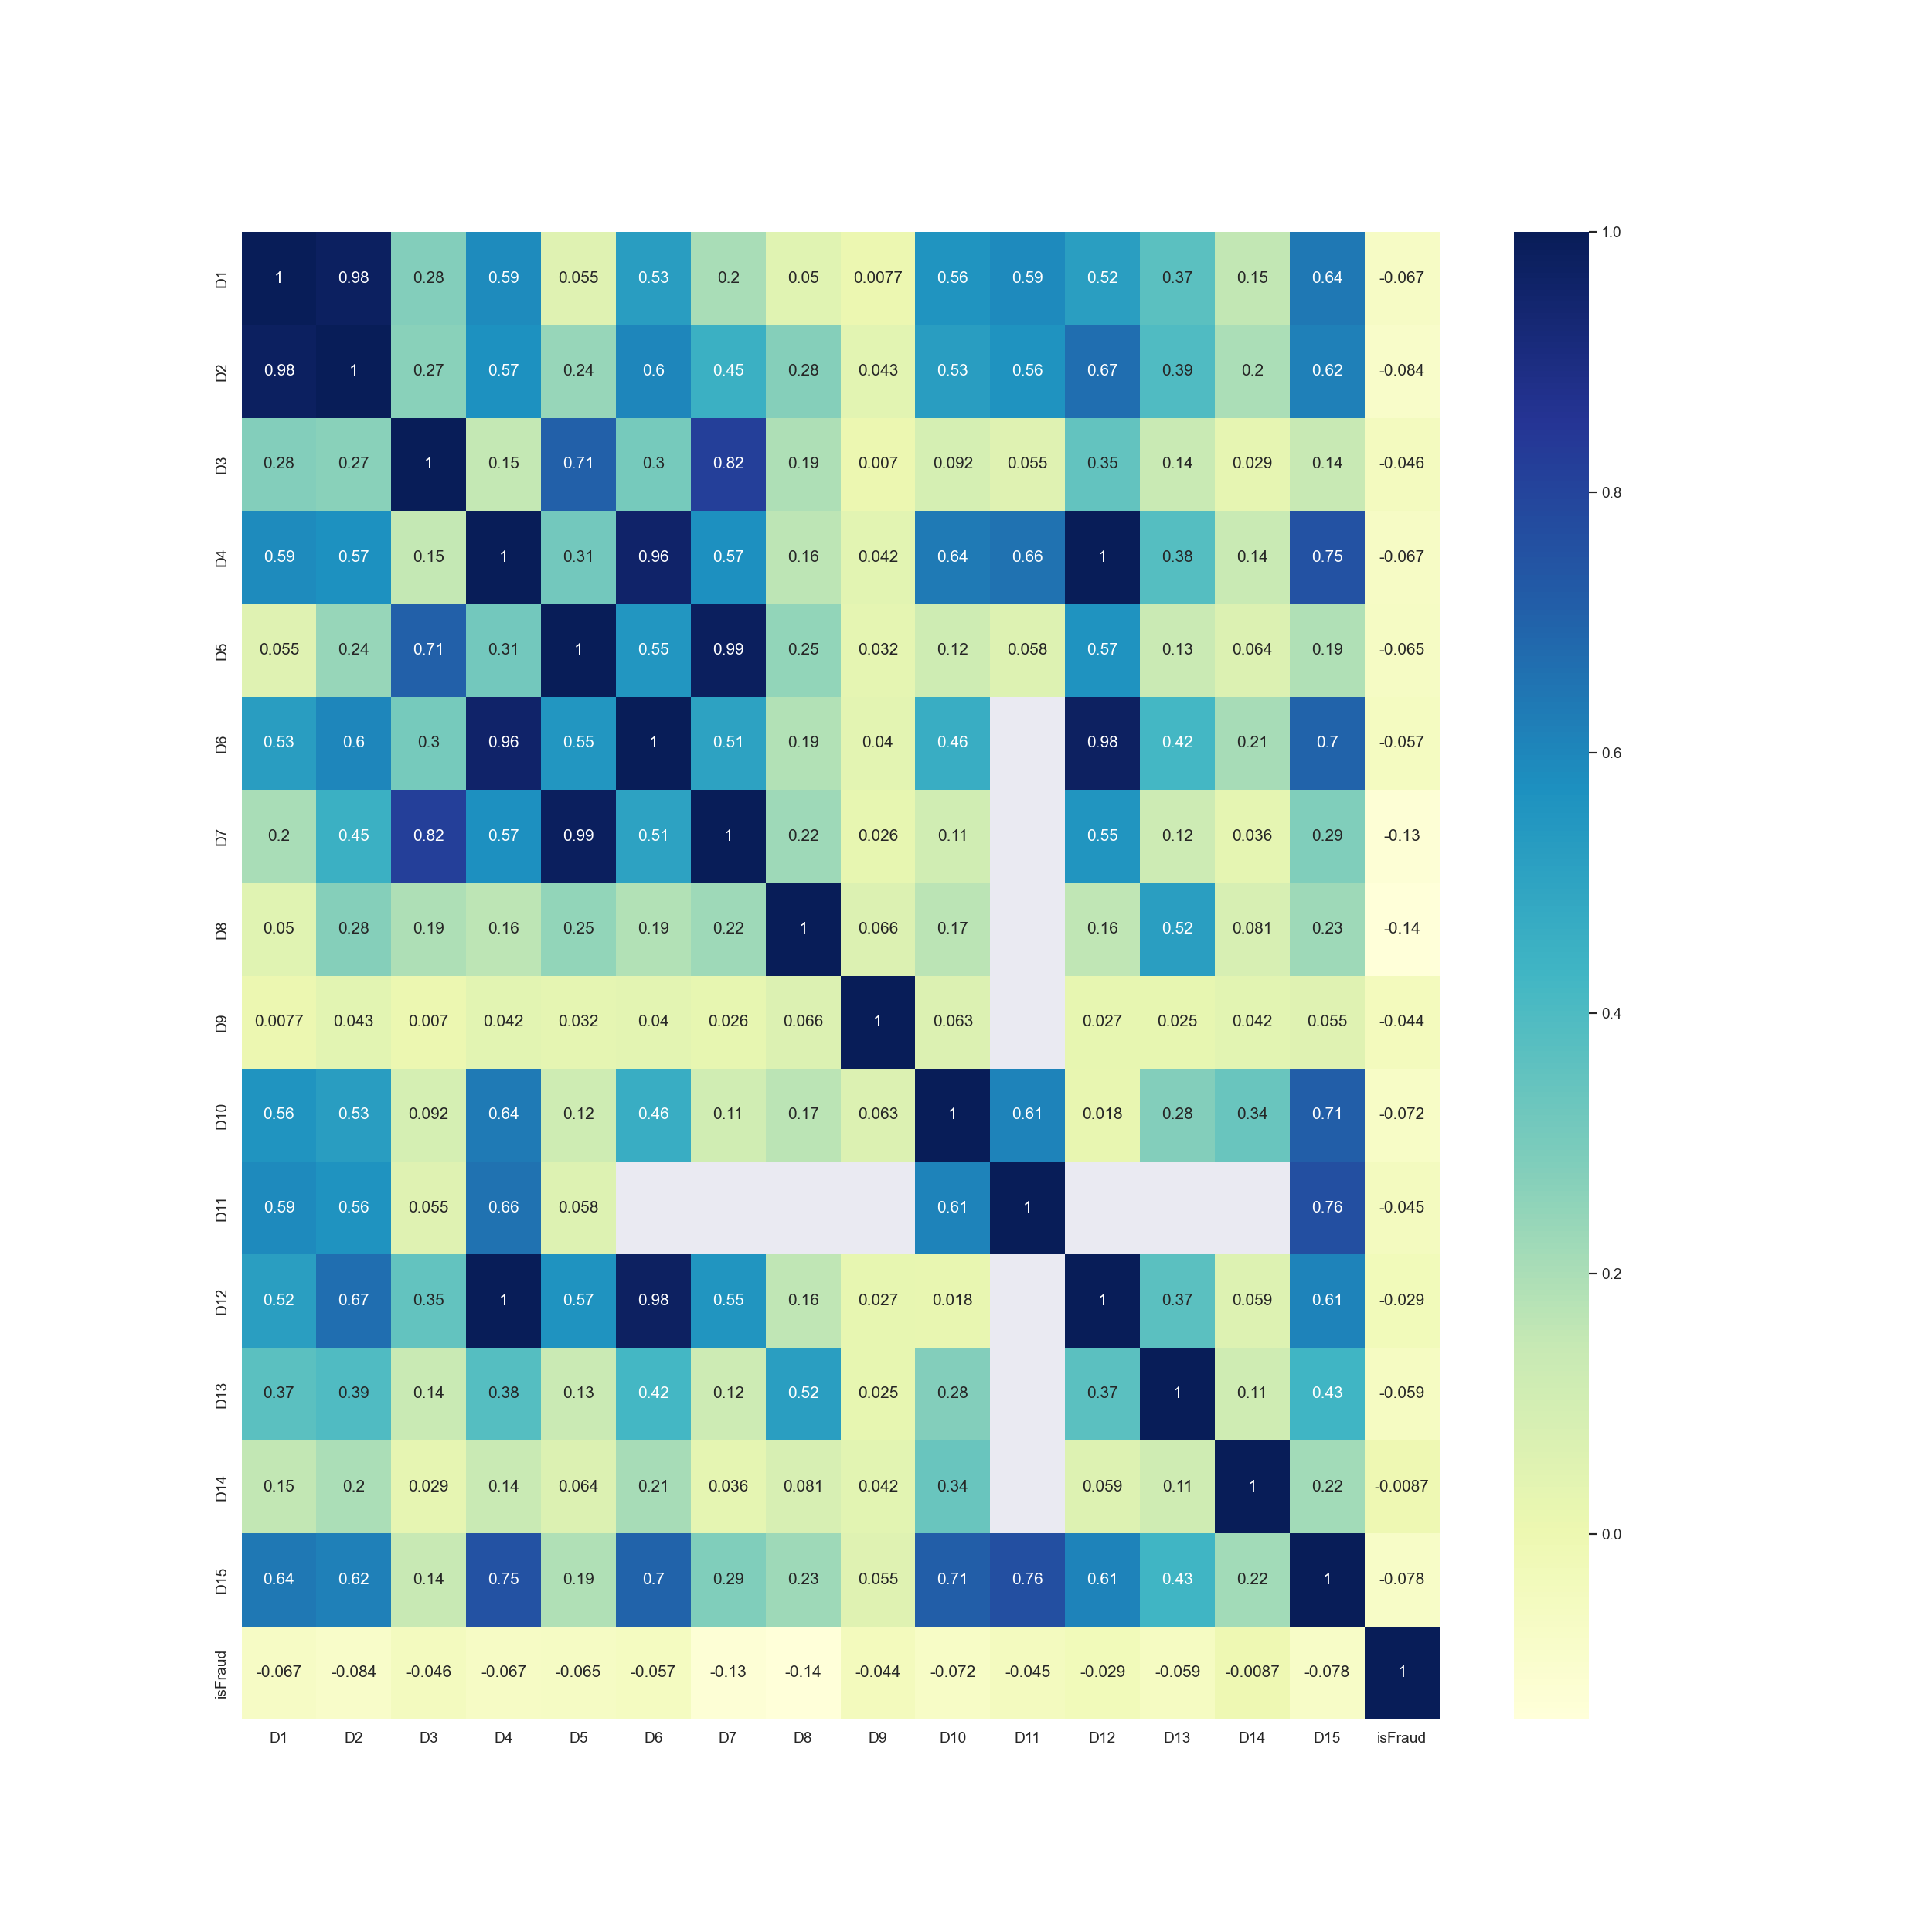

In [26]:
correlation_D = full_train[D_features].corr()
plt.subplots(figsize = (20, 20))
sns.heatmap(correlation_D,annot=True, cmap = 'YlGnBu') 
sns.set(font_scale=1)

In [27]:
new_D = correlation(correlation_D, 0.9)

In [29]:
print( "Ces caractéristiques sont fortement corrélées" + str(new_D))

Ces caractéristiques sont fortement corrélées{'D7', 'D12', 'D15', 'D2', 'D6', 'D13'}


# Coorelation analysis on V columns

D'après le pourcentage de caractéristiques manquantes ci-dessus, 
nous constatons que des valeurs de préfixe V similaires ont un pourcentage manquant similaire.
donc nous les prenons comme un groupe

# Group 1 - V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 shows 0.4729 % missing value

In [30]:
V1G_features =['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11']

In [31]:
V1G_features += ['isFraud']

In [32]:
correlation_V1G = full_train[V1G_features].corr()

<IPython.core.display.Javascript object>


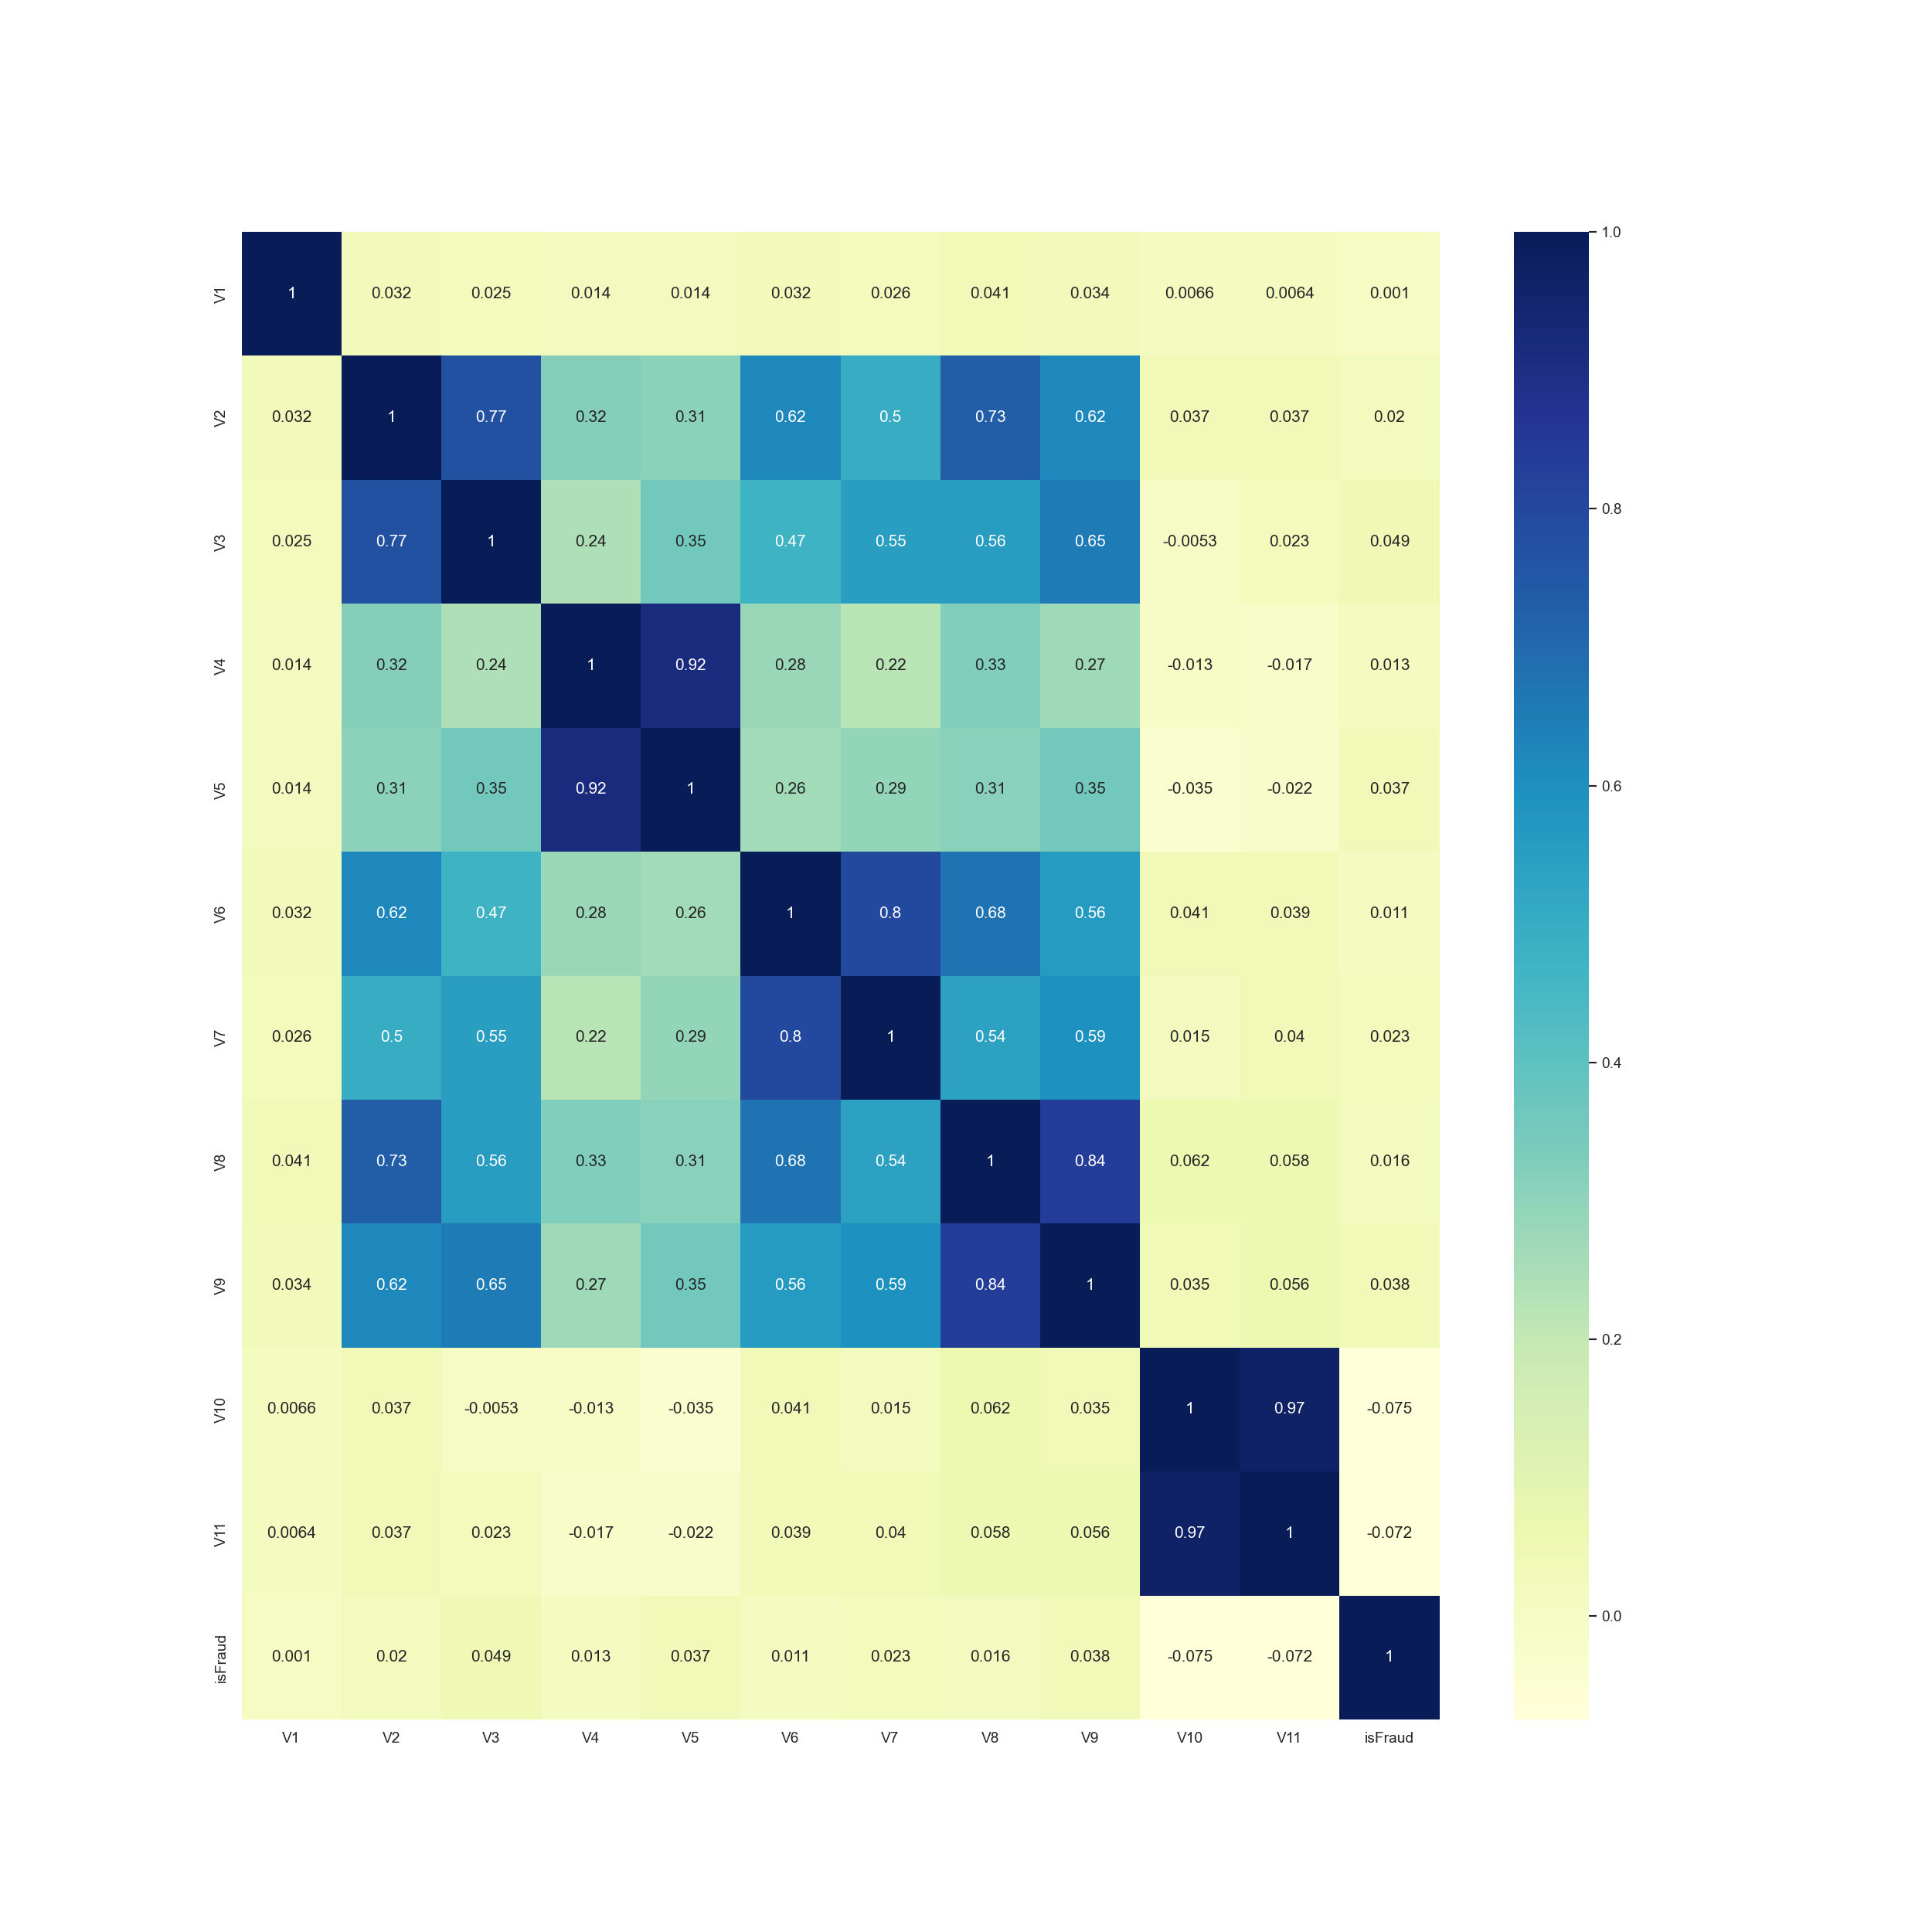

In [33]:
plt.subplots(figsize = (20, 20))
sns.heatmap(correlation_V1G ,annot=True, cmap = 'YlGnBu') 
sns.set(font_scale=1)

In [34]:
new_V1 = correlation(correlation_V1G, 0.9)

In [36]:
print( "Ces caractéristiques sont fortement corrélées" + str(new_V1))

Ces caractéristiques sont fortement corrélées{'V7', 'V8', 'V9', 'V5', 'V3', 'V11'}


# Group 2 V12-V34 0.1288 % missing values

In [37]:
V2G_features =['V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','V29','V30','V31','V32','V33','V34']

In [38]:
V2G_features += ['isFraud']

In [40]:
correlation_V2G = full_train[V2G_features].corr()

<IPython.core.display.Javascript object>


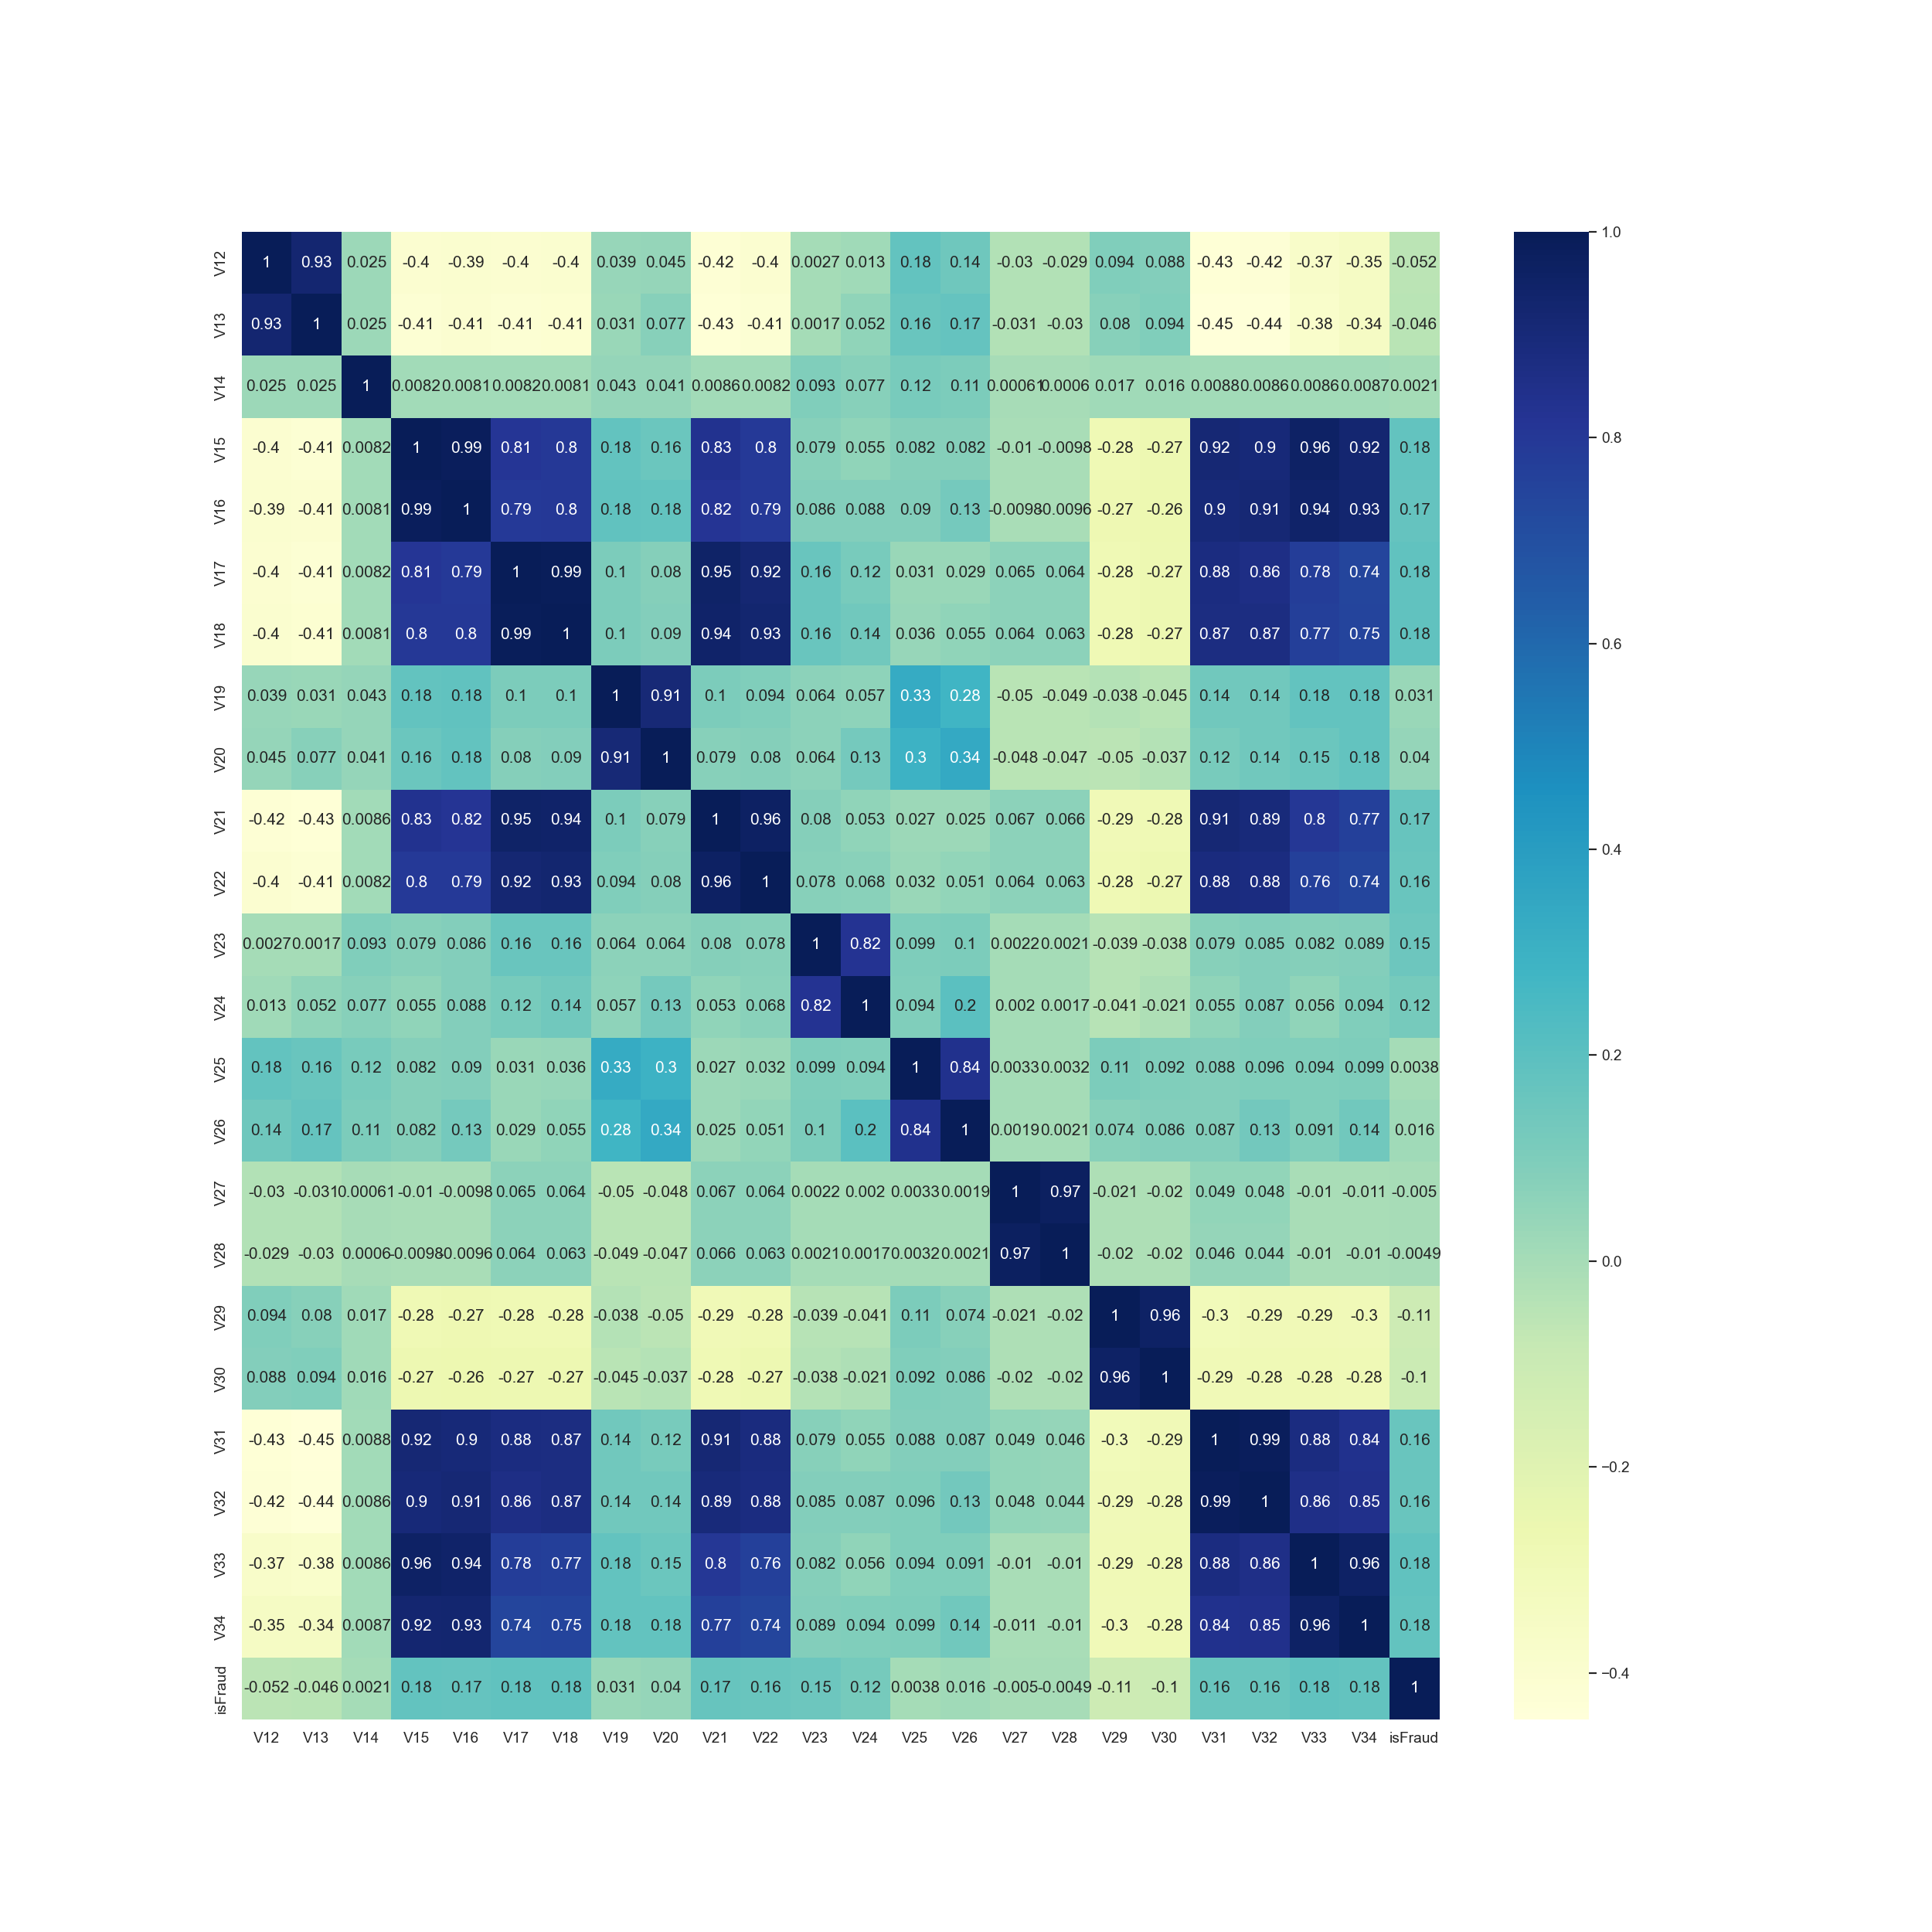

In [41]:
plt.subplots(figsize = (20, 20))
sns.heatmap(correlation_V2G ,annot=True, cmap = 'YlGnBu') 
sns.set(font_scale=1)

In [42]:
new_V2 = correlation(correlation_V2G, 0.9)

In [44]:
print( "Ces caractéristiques sont fortement corrélées" + str(new_V2))

Ces caractéristiques sont fortement corrélées{'V32', 'V16', 'V13', 'V18', 'V28', 'V21', 'V17', 'V26', 'V34', 'V33', 'V31', 'V24', 'V20', 'V22', 'V30'}


# Group3 V35 - V52 0.2861 % missing values

In [45]:
V3G = ['V35','V36','V37','V38','V39','V40','V41','V42','V43','V44','V45','V46','V47','V48','V49','V50','V51','V52']

In [46]:
V3G += ['isFraud']

In [48]:
correlation_V3G = full_train[V3G].corr()

In [49]:
new_V3 = correlation(correlation_V3G, 0.8)

In [51]:
print( "Ces caractéristiques sont fortement corrélées" + str(new_V3))

Ces caractéristiques sont fortement corrélées{'V36', 'V49', 'V39', 'V44', 'V45', 'V47', 'V50', 'V38', 'V43', 'V52', 'V51', 'V40', 'V42'}


# Group 4 V53 - V74 0.1306 % missing values

In [52]:
V4G = ['V53','V54','V55','V56','V57','V58','V59','V60','V61','V62','V63','V64','V65','V66','V67','V68','V69','V70','V71','V72','V73','V74']

In [53]:
V4G += ['isFraud']

In [57]:
correlation_V4G = full_train[V4G].corr()

In [58]:
new_V4 = correlation(correlation_V4G, 0.8)

In [59]:
print( "Threse features are highly correlated" + str(new_V4))

Threse features are highly correlated{'V62', 'V54', 'V67', 'V64', 'V72', 'V58', 'V59', 'V73', 'V57', 'V63', 'V71', 'V70', 'V60', 'V74', 'V56'}


# Group 5 V75 -V94 0.151 % missing values

In [60]:
V5G = ['V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94']

In [61]:
V5G += ['isFraud']

In [63]:
correlation_V5G = full_train[V5G].corr()

In [64]:
new_V5 = correlation(correlation_V5G, 0.8)

In [65]:
print( "Threse features are highly correlated" + str(new_V5))

Threse features are highly correlated{'V76', 'V81', 'V87', 'V86', 'V94', 'V78', 'V79', 'V92', 'V83', 'V91', 'V93', 'V84', 'V85', 'V80'}


# Group 6 V95 -V137

In [66]:
V6G = ['V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137']

In [67]:
V6G += ['isFraud']

In [69]:
correlation_V6G = full_train[V6G].corr()

In [70]:
new_V6 = correlation(correlation_V6G, 0.8)

In [71]:
print( "Threse features are highly correlated" + str(new_V6))

Threse features are highly correlated{'V114', 'V113', 'V116', 'V105', 'V126', 'V110', 'V132', 'V104', 'V123', 'V120', 'V111', 'V118', 'V136', 'V103', 'V102', 'V133', 'V128', 'V106', 'V109', 'V119', 'V127', 'V134', 'V137', 'V101', 'V117', 'V100', 'V122', 'V112', 'V131', 'V125', 'V115', 'V130', 'V96', 'V97'}


# Group 7 V95 -V137

In [72]:
V7G=['V138', 'V139', 'V140', 'V141', 'V142', 'V146', 'V147', 'V148', 'V149', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V161', 'V162', 'V163']

In [73]:
V7G += ['isFraud']

In [75]:
correlation_V7G = full_train[V7G].corr()

In [80]:
new_V7 = correlation(correlation_V7G, 0.8)

In [77]:
print( "Threse features are highly correlated" + str(new_V7))

Threse features are highly correlated{'V158', 'V156', 'V149', 'V140', 'V154', 'V155', 'V157', 'V142', 'V147', 'V153', 'V162', 'V163', 'V161'}


# Group 8 V143 - 166

In [78]:
V8G = ['V143', 'V144', 'V145', 'V150', 'V151', 'V152', 'V159', 'V160', 'V164', 'V165', 'V166']

In [79]:
V8G += ['isFraud']

In [88]:
correlation_V8G = full_train[V8G].corr()

In [90]:
new_V8 = correlation(correlation_V8G, 0.8)

In [92]:
print( "Threse features are highly correlated" + str(new_V8))

Threse features are highly correlated{'V166', 'V164', 'V152', 'V160', 'V150', 'V145', 'V159', 'V151', 'V165'}


# Group 9 V167 - V216

In [94]:
V9G = ['V167', 'V168', 'V172', 'V173', 'V176', 'V177', 'V178', 'V179', 'V181', 'V182', 'V183', 'V186', 'V187', 'V190', 'V191', 'V192', 'V193', 'V196', 'V199', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216']

In [95]:
V9G += ['isFraud']

In [96]:
correlation_V8G = full_train[V9G].corr()

In [98]:
new_V9 = correlation(correlation_V8G, 0.8)

In [99]:
print( "Threse features are highly correlated" + str(new_V9))

Threse features are highly correlated{'V182', 'V177', 'V168', 'V203', 'V193', 'V211', 'V183', 'V213', 'V207', 'V212', 'V191', 'V179', 'V181', 'V216', 'V186', 'V192', 'V204', 'V176', 'V190', 'V196', 'V205', 'V187', 'V202', 'V178', 'V199'}


# Group 10

In [104]:
V10G= ['V217', 'V218', 'V219', 'V223', 'V224', 'V225', 'V226', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V235', 'V236', 'V237', 'V240', 'V241', 'V242', 'V243', 'V244', 'V246', 'V247', 'V248', 'V249', 'V252', 'V253', 'V254', 'V257', 'V258', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278']

In [105]:
V10G += ['isFraud']

In [106]:
correlation_V10G = full_train[V10G].corr()

In [107]:
new_V10 = correlation(correlation_V10G, 0.8)

In [108]:
print( "Threse features are highly correlated" + str(new_V10))

Threse features are highly correlated{'V225', 'V273', 'V224', 'V263', 'V230', 'V274', 'V237', 'V236', 'V277', 'V268', 'V269', 'V248', 'V278', 'V257', 'V233', 'V219', 'V267', 'V235', 'V254', 'V258', 'V262', 'V261', 'V265', 'V218', 'V232', 'V243', 'V242', 'V252', 'V244', 'V229', 'V241', 'V249', 'V253', 'V231', 'V246', 'V275', 'V247'}


# Group 11

In [113]:
V11G = ['V220', 'V221', 'V222', 'V227', 'V234', 'V238', 'V239', 'V245', 'V250', 'V251', 'V255', 'V256', 'V259', 'V270', 'V271', 'V272']

In [114]:
V11G += ['isFraud']

In [115]:
correlation_V11G = full_train[V11G].corr()

In [116]:
new_V11 = correlation(correlation_V11G, 0.8)

In [117]:
print( "Threse features are highly correlated" + str(new_V11))

Threse features are highly correlated{'V255', 'V256', 'V251', 'V272', 'V227', 'V271', 'V245', 'V239', 'V259', 'V222'}


# Group 12

In [122]:
V12G = ['V279', 'V280', 'V284', 'V285', 'V286', 'V287', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V297', 'V298', 'V299', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321']

In [123]:
V12G += ['isFraud']

In [124]:
correlation_V12G = full_train[V12G].corr()

In [125]:
new_V12 = correlation(correlation_V12G, 0.8)

In [126]:
print( "Threse features are highly correlated" + str(new_V12))

Threse features are highly correlated{'V292', 'V311', 'V299', 'V293', 'V308', 'V297', 'V312', 'V316', 'V280', 'V298', 'V306', 'V318', 'V320', 'V303', 'V291', 'V304', 'V321', 'V287', 'V307', 'V294', 'V295', 'V310', 'V317'}


# Group 13

In [131]:
V13G = ['V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339']

In [132]:
V13G += ['isFraud']

In [133]:
correlation_V13G = full_train[V13G].corr()

In [134]:
new_V13 = correlation(correlation_V13G, 0.8)

In [135]:
print( "Threse features are highly correlated" + str(new_V13))

Threse features are highly correlated{'V324', 'V333', 'V332', 'V323', 'V338', 'V327', 'V339', 'V336', 'V330', 'V328', 'V331', 'V329', 'V326'}


# Device feature

In [136]:
Device_features =[features for features in full_train.columns if 'Device' in features]

In [139]:
for f in Device_features:
    print(full_train[f].value_counts())

desktop    85165
mobile     55645
Name: DeviceType, dtype: int64
Windows        47722
iOS Device     19782
MacOS          12573
Trident/7.0     7440
rv:11.0         1901
               ...  
LGMS345            1
verykool           1
XT1072             1
LG-H931            1
0PJA2              1
Name: DeviceInfo, Length: 1786, dtype: int64


# email_features

In [140]:
email_features =[features for features in full_train.columns if 'emaildomain' in features]

In [142]:
for f in email_features:
    print(full_train[f].value_counts())

gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
hotmail.es             305
roadrunner.com         305
windstream.net         305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
netzero.com            230
t

Après l'EDA, nous trouvons que ce sont les caractéristiques sélectionnées pour les calculs futurs

In [143]:
new_features = ['TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card5','card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain''R_emaildomain', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9','C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5','D10', 'D11', 'D15', 'M1', 'M2', 'M3', 'M4', 'M6', 'M7', 'M8','M9', 'V1', 'V3', 'V4', 'V6', 'V8', 'V11', 'V13', 'V14', 'V17','V20', 'V23', 'V26', 'V27', 'V30', 'V36', 'V37', 'V40', 'V41','V44', 'V47', 'V48', 'V54', 'V56', 'V59', 'V62', 'V65', 'V67','V68', 'V70', 'V76', 'V78', 'V80', 'V82', 'V86', 'V88', 'V89','V91', 'V107', 'V108', 'V111', 'V115', 'V117', 'V120', 'V121','V123', 'V124', 'V127', 'V129', 'V130', 'V136', 'V138', 'V139','V142', 'V147', 'V156', 'V160', 'V162', 'V165', 'V166', 'V169','V171', 'V173', 'V175', 'V176', 'V178', 'V180', 'V182', 'V185','V187', 'V188', 'V198', 'V203', 'V205', 'V207', 'V209', 'V210','V215', 'V218', 'V220', 'V221', 'V223', 'V224', 'V226', 'V228','V229', 'V234', 'V235', 'V238', 'V240', 'V250', 'V252', 'V253','V257', 'V258', 'V260', 'V261', 'V264', 'V266', 'V267', 'V271','V274', 'V277', 'V281', 'V283', 'V284', 'V285', 'V286', 'V289','V291', 'V294', 'V296', 'V297', 'V301', 'V303', 'V305', 'V307','V309', 'V310', 'V314', 'V320', 'id_01', 'id_02', 'id_03', 'id_04','id_05', 'id_06', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13','id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_28','id_29', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType','DeviceInfo']

In [146]:
for features in full_train.columns: 
    if features not in new_features: 
        full_train = full_train.drop(features, axis = 1)


In [148]:
len(full_train.columns.tolist())
#print(train.columns.tolist())


186

In [150]:
pnd. set_option("display.max_columns", None)
pnd. set_option("display.max_rows", None)


In [152]:
full_train.head()

TransactionAmt ProductCD  card1  card2  card3  card5   card6  addr1  addr2  \
0            68.5         W  13926    NaN  150.0  142.0  credit  315.0   87.0   
1            29.0         W   2755  404.0  150.0  102.0  credit  325.0   87.0   
2            59.0         W   4663  490.0  150.0  166.0   debit  330.0   87.0   
3            50.0         W  18132  567.0  150.0  117.0   debit  476.0   87.0   
4            50.0         H   4497  514.0  150.0  102.0  credit  420.0   87.0   

   dist1  dist2   C1   C2   C4   C5   C6   C7   C8   C9  C10  C11  C12   C13  \
0   19.0    NaN  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  2.0  0.0   1.0   
1    NaN    NaN  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   1.0   
2  287.0    NaN  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   1.0   
3    NaN    NaN  2.0  5.0  0.0  0.0  4.0  0.0  0.0  1.0  0.0  1.0  0.0  25.0   
4    NaN    NaN  1.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0   1.0   

   C14     D1     D2    D3    D4   D5   D10    D11    D15   M1   M2   M3   M4  \
0  1.0   14.0    NaN  13.0   NaN  NaN  13.0   13.0    0.0    T    T    T   M2   
1  1.0    0.0    NaN   NaN   0.0  NaN   0.0    NaN    0.0  NaN  NaN  NaN   M0   
2  1.0    0.0    NaN   NaN   0.0  NaN   0.0  315.0  315.0    T    T    T   M0   
3  1.0  112.0  112.0   0.0  94.0  0.0  84.0    NaN  111.0  NaN  NaN  NaN   M0   
4  1.0    0.0    NaN   NaN   NaN  NaN   NaN    NaN    NaN  NaN  NaN  NaN  NaN   

    M6   M7   M8   M9   V1   V3   V4   V6   V8  V11  V13  V14  V17  V20  V23  \
0    T  NaN  NaN  NaN  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0   
1    T  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  1.0  0.0  1.0  1.0   
2    F    F    F    F  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0   
3    F  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  0.0  1.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V26  V27  V30  V36  V37  V40  V41  V44  V47  V48  V54  V56  V59  V62  V65  \
0  1.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  0.0  1.0  1.0   
1  1.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  1.0   
2  1.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0   
3  1.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V67  V68  V70  V76  V78  V80  V82  V86  V88  V89  V91  V107  V108  V111  \
0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0   1.0   1.0   1.0   
1  1.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0   1.0   1.0   1.0   
2  1.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0   1.0   1.0   1.0   
3  1.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0   1.0   1.0   1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   1.0   1.0   1.0   

   V115  V117  V120  V121  V123  V124    V127  V129   V130  V136  V138  V139  \
0   1.0   1.0   1.0   1.0   1.0   1.0   117.0   0.0    0.0   0.0   NaN   NaN   
1   1.0   1.0   1.0   1.0   1.0   1.0     0.0   0.0    0.0   0.0   NaN   NaN   
2   1.0   1.0   1.0   1.0   1.0   1.0     0.0   0.0    0.0   0.0   NaN   NaN   
3   1.0   1.0   1.0   1.0   1.0   1.0  1758.0   0.0  354.0   0.0   NaN   NaN   
4   1.0   1.0   1.0   1.0   1.0   1.0     0.0   0.0    0.0   0.0   0.0   0.0   

   V142  V147  V156           V160  V162    V165    V166  V169  V171  V173  \
0   NaN   NaN   NaN            NaN   NaN     NaN     NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN            NaN   NaN     NaN     NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN            NaN   NaN     NaN     NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN            NaN   NaN     NaN     NaN   NaN   NaN   NaN   
4   0.0   0.0   0.0  169690.796875   0.0  5155.0  2840.0   0.0   1.0   0.0   

   V175  V176  V178  V180  V182  V185  V187  V188  V198  V203  V205  V207  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN

# Numerical Variables

# Train

In [153]:
numerical_features = [feature for feature in full_train.columns if full_train[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
full_train[numerical_features].head()


Number of numerical variables:  164


TransactionAmt  card1  card2  card3  card5  addr1  addr2  dist1  dist2  \
0            68.5  13926    NaN  150.0  142.0  315.0   87.0   19.0    NaN   
1            29.0   2755  404.0  150.0  102.0  325.0   87.0    NaN    NaN   
2            59.0   4663  490.0  150.0  166.0  330.0   87.0  287.0    NaN   
3            50.0  18132  567.0  150.0  117.0  476.0   87.0    NaN    NaN   
4            50.0   4497  514.0  150.0  102.0  420.0   87.0    NaN    NaN   

    C1   C2   C4   C5   C6   C7   C8   C9  C10  C11  C12   C13  C14     D1  \
0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  2.0  0.0   1.0  1.0   14.0   
1  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   1.0  1.0    0.0   
2  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0   
3  2.0  5.0  0.0  0.0  4.0  0.0  0.0  1.0  0.0  1.0  0.0  25.0  1.0  112.0   
4  1.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0   1.0  1.0    0.0   

      D2    D3    D4   D5   D10    D11    D15   V1   V3   V4   V6   V8  V11  \
0    NaN  13.0   NaN  NaN  13.0   13.0    0.0  1.0  1.0  1.0  1.0  1.0  0.0   
1    NaN   NaN   0.0  NaN   0.0    NaN    0.0  NaN  NaN  NaN  NaN  NaN  NaN   
2    NaN   NaN   0.0  NaN   0.0  315.0  315.0  1.0  1.0  1.0  1.0  1.0  0.0   
3  112.0   0.0  94.0  0.0  84.0    NaN  111.0  NaN  NaN  NaN  NaN  NaN  NaN   
4    NaN   NaN   NaN  NaN   NaN    NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V13  V14  V17  V20  V23  V26  V27  V30  V36  V37  V40  V41  V44  V47  V48  \
0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  0.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0   
2  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0   
3  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V54  V56  V59  V62  V65  V67  V68  V70  V76  V78  V80  V82  V86  V88  V89  \
0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0   
1  0.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0   
2  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0   
3  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V91  V107  V108  V111  V115  V117  V120  V121  V123  V124    V127  V129  \
0  0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   117.0   0.0   
1  0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0     0.0   0.0   
2  0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0     0.0   0.0   
3  0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  1758.0   0.0   
4  NaN   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0     0.0   0.0   

    V130  V136  V138  V139  V142  V147  V156           V160  V162    V165  \
0    0.0   0.0   NaN   NaN   NaN   NaN   NaN            NaN   NaN     NaN   
1    0.0   0.0   NaN   NaN   NaN   NaN   NaN            NaN   NaN     NaN   
2    0.0   0.0   NaN   NaN   NaN   NaN   NaN            NaN   NaN     NaN   
3  354.0   0.0   NaN   NaN   NaN   NaN   NaN            NaN   NaN     NaN   
4    0.0   0.0   0.0   0.0   0.0   0.0   0.0  169690.796875   0.0  5155.0   

     V166  V169  V171  V173  V175  V176  V178  V180  V182  V185  V187  V188  \
0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  2840.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   1.0   1.0   

   V198  V203  V205  V207  V209  V210  V215  V218  V220  V221  V223  V224  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

In [154]:
for feature in numerical_features: 
    ## We will replace by using median since there are outliers
    mean_value= full_train[feature].mean()
    
    ## create a new feature to capture nan values
    full_train[feature+'nan']=np.where(full_train[feature].isnull(),1,0)
    full_train[feature].fillna(mean_value,inplace=True)


C:\Users\randr\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [ ]:
df_num_train = full_train[numerical_features]
# visualise the numerical variables
df_num_train.head()

# Categorical Variables

# Train
Categorical Features

In [157]:
categorical_features = [feature for feature in full_train.columns if full_train[feature].dtypes == 'O']

print('Number of categorical variables: ', len(categorical_features)) 

# visualise the numerical variables
df_cat_train = full_train[categorical_features]

Number of categorical variables:  22


In [158]:
df_cat_train.head()

ProductCD   card6   M1   M2   M3   M4   M6   M7   M8   M9     id_12 id_15  \
0         W  credit    T    T    T   M2    T  NaN  NaN  NaN       NaN   NaN   
1         W  credit  NaN  NaN  NaN   M0    T  NaN  NaN  NaN       NaN   NaN   
2         W   debit    T    T    T   M0    F    F    F    F       NaN   NaN   
3         W   debit  NaN  NaN  NaN   M0    F  NaN  NaN  NaN       NaN   NaN   
4         H  credit  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NotFound   New   

      id_16 id_28     id_29                id_31 id_35 id_36 id_37 id_38  \
0       NaN   NaN       NaN                  NaN   NaN   NaN   NaN   NaN   
1       NaN   NaN       NaN                  NaN   NaN   NaN   NaN   NaN   
2       NaN   NaN       NaN                  NaN   NaN   NaN   NaN   NaN   
3       NaN   NaN       NaN                  NaN   NaN   NaN   NaN   NaN   
4  NotFound   New  NotFound  samsung browser 6.2     T     F     T     T   

  DeviceType                     DeviceInfo  
0        NaN                            NaN  
1        NaN                            NaN  
2        NaN                            NaN  
3        NaN                            NaN  
4     mobile  SAMSUNG SM-G892A Build/NRD90M

In [159]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [160]:
for features in df_cat_train.columns: 
    imp = imp.fit(df_cat_train[[features]])
    #train[categorical_features] = imp.transform(train[categorical_features])

    df_cat_train[features]= imp.transform(df_cat_train[[features]])


C:\Users\randr\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\randr\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\randr\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [161]:
df_cat_train.head()

ProductCD   card6 M1 M2 M3  M4 M6 M7 M8 M9     id_12  id_15     id_16  \
0         W  credit  T  T  T  M2  T  F  F  T  NotFound  Found     Found   
1         W  credit  T  T  T  M0  T  F  F  T  NotFound  Found     Found   
2         W   debit  T  T  T  M0  F  F  F  F  NotFound  Found     Found   
3         W   debit  T  T  T  M0  F  F  F  T  NotFound  Found     Found   
4         H  credit  T  T  T  M0  F  F  F  T  NotFound    New  NotFound   

   id_28     id_29                id_31 id_35 id_36 id_37 id_38 DeviceType  \
0  Found     Found          chrome 63.0     T     F     T     F    desktop   
1  Found     Found          chrome 63.0     T     F     T     F    desktop   
2  Found     Found          chrome 63.0     T     F     T     F    desktop   
3  Found     Found          chrome 63.0     T     F     T     F    desktop   
4    New  NotFound  samsung browser 6.2     T     F     T     T     mobile   

                      DeviceInfo  
0                        Windows  
1                        Windows  
2                        Windows  
3                        Windows  
4  SAMSUNG SM-G892A Build/NRD90M